<a href="https://colab.research.google.com/github/umerjavaidkh/machine_learning_basics/blob/main/Seoul_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


In [98]:
colums = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

In [99]:
df = pd.read_csv("SeoulBikeData2.csv")
df = df.drop(df.columns[[0, 11, 12]], axis=1)

In [100]:
df.head()

,254,0,-5.2,37,2.2,2000,-17.6,0.1,0.2,0.3,Yes
0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
2,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
3,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
4,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Yes


In [101]:
df.columns = colums
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
2,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
3,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
4,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Yes


In [102]:
df["functional"] = (df["functional"] == "Yes").astype(int)


In [103]:
#df=df.drop(["hour"], axis=1)
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
2,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
3,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1
4,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,1


In [104]:
df = df[df["hour"] == 12]

In [105]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
11,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
35,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
59,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
83,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
107,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [106]:
df=df.drop(["hour"], axis=1)

In [107]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
11,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
35,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
59,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
83,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
107,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


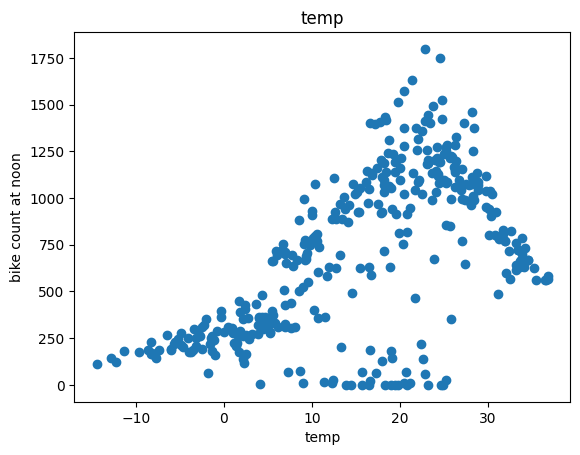

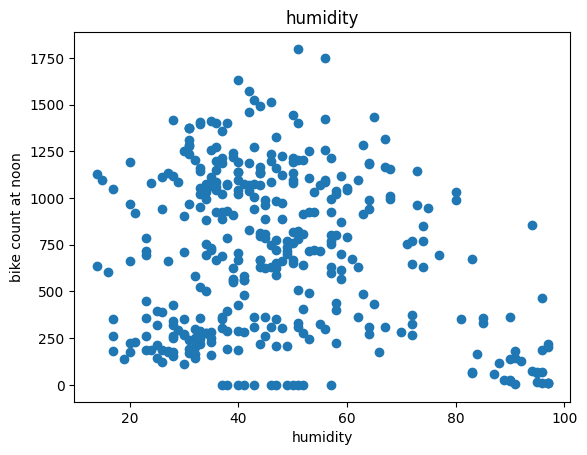

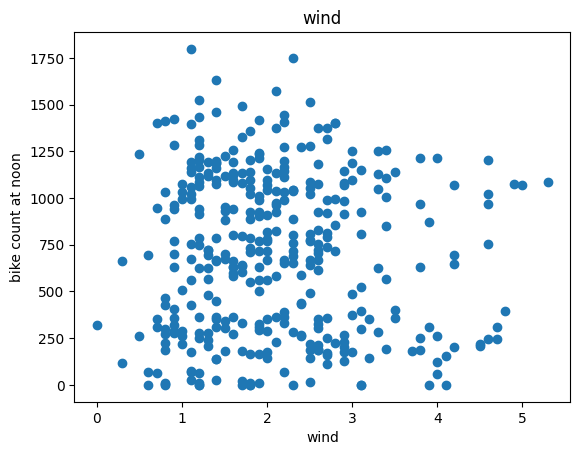

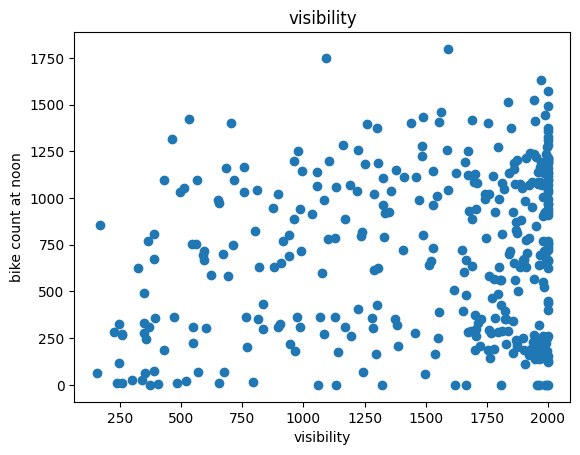

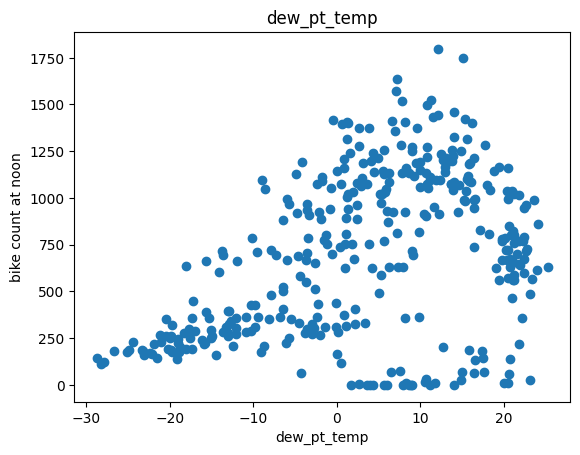

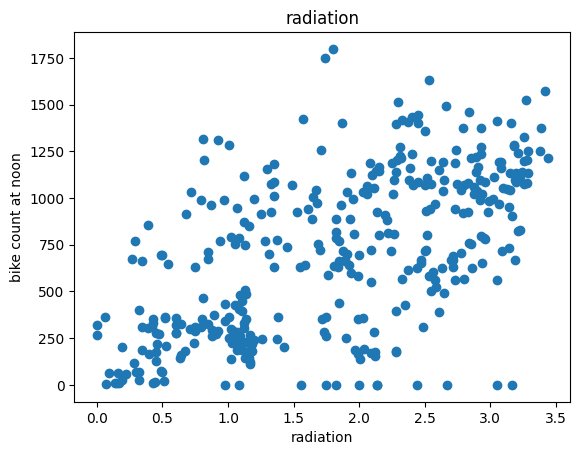

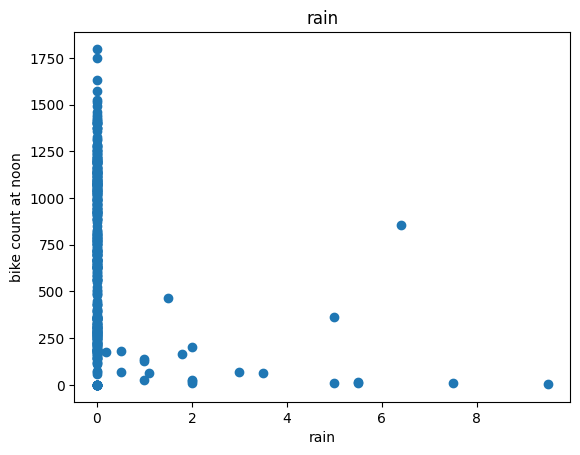

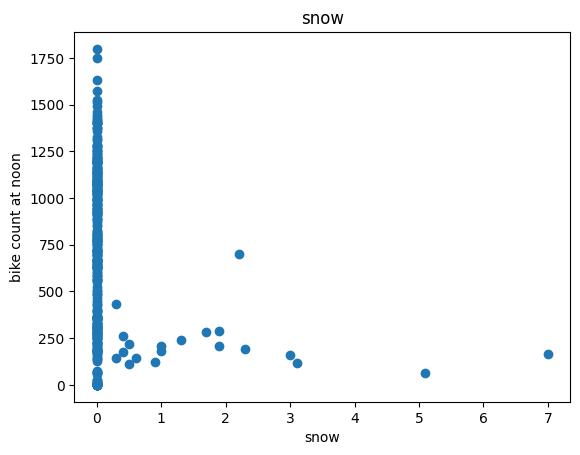

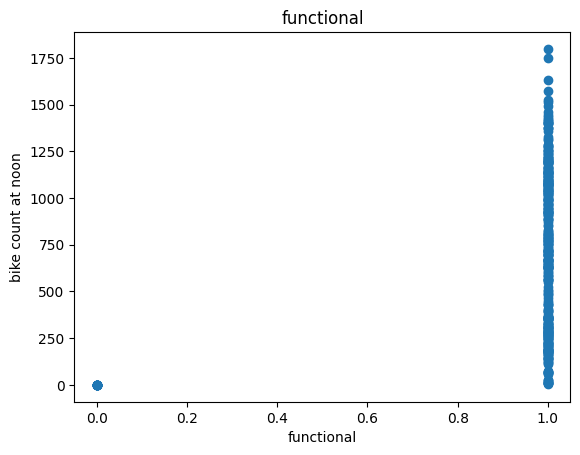

In [108]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("bike count at noon")
  plt.show()

In [97]:
df= df.drop(["wind", "visibility", "functional"], axis=1)

KeyError: "['wind', 'visibility', 'functional'] not found in axis"

In [20]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
11,449,1.7,23,-17.2,1.11,0.0,0.0
35,479,4.3,41,-7.8,1.09,0.0,0.0
59,333,5.8,85,3.4,0.43,0.0,0.0
83,393,-0.3,38,-12.9,1.11,0.0,0.0
107,321,-2.3,25,-19.7,0.00,0.0,0.0


Tainding ---- Validation -------- Test     ---------------->        Dataset

In [72]:
def getX_Y1(df, y_label, x_label = None):
  dataframe = copy.deepcopy(df)
  if x_label is None:
    X = dataframe[[c for c in df.columns if c != y_label]].values
  else:
    if len(x_label) == 1:
      X = dataframe[x_label[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_label].values

  Y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, Y))
  return data, X, Y

In [109]:
def getX_Y(df, y_label, x_label=None):
    dataframe = copy.deepcopy(df)

    # Handle default case
    if x_label is None:
        x_label = [c for c in df.columns if c != y_label]

    # Print columns and subset for debugging
    print("DataFrame columns:", dataframe.columns)
    print("Subset for dropna:", x_label + [y_label])

    # Drop rows with NaNs in either features or target
    existing_cols = [col for col in (x_label + [y_label]) if col in dataframe.columns]
    dataframe = dataframe.dropna(subset=existing_cols)

    # Extract X
    if len(x_label) == 1:
        X = dataframe[x_label[0]].values.reshape(-1, 1)
    else:
        X = dataframe[x_label].values

    # Extract Y
    Y = dataframe[y_label].values.reshape(-1, 1)

    # Combine
    data = np.hstack((X, Y))
    return data, X, Y

In [145]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [146]:
data_train_temp, x_train_temp, y_train_temp = getX_Y(train, "bike_count", x_label=["temp"])
data_valid_temp, x_valid_temp, y_valid_temp = getX_Y(valid, "bike_count", x_label=["temp"])
data_test_temp, x_test_temp, y_test_temp = getX_Y(test, "bike_count", x_label=["temp"])

DataFrame columns: Index(['bike_count', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp',
       'radiation', 'rain', 'snow', 'functional'],
      dtype='object')
Subset for dropna: ['temp', 'bike_count']
DataFrame columns: Index(['bike_count', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp',
       'radiation', 'rain', 'snow', 'functional'],
      dtype='object')
Subset for dropna: ['temp', 'bike_count']
DataFrame columns: Index(['bike_count', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp',
       'radiation', 'rain', 'snow', 'functional'],
      dtype='object')
Subset for dropna: ['temp', 'bike_count']


In [147]:
print(x_train.size)
print(y_train.size)

1971
219


In [77]:
temp_reg = LinearRegression()
temp_reg.fit(x_train, y_train)

LinearRegression()

In [78]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.8880134]] [371.52407867]


In [79]:
temp_reg.score(x_test, y_test)

0.2950287083582137

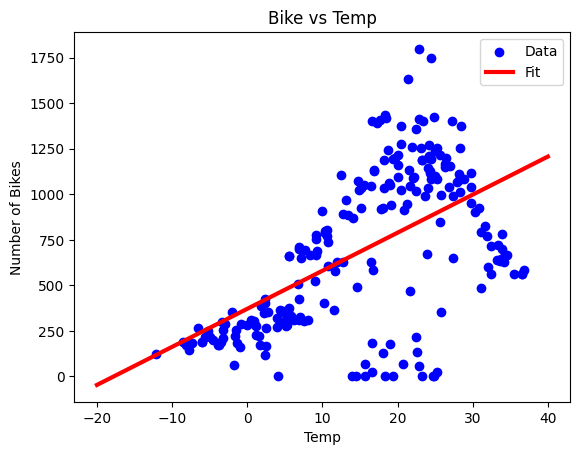

In [80]:
plt.scatter(x_train, y_train, color="blue", label="Data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), color="red", label="Fit", linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.show()

In [148]:
# Multiple Linear Regression

data_train, x_train, y_train = getX_Y(train, "bike_count", x_label=df.columns[1:])
data_valid, x_valid, y_valid = getX_Y(valid, "bike_count", x_label=df.columns[1:])
data_test, x_test, y_test = getX_Y(test, "bike_count", x_label=df.columns[1:])

DataFrame columns: Index(['bike_count', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp',
       'radiation', 'rain', 'snow', 'functional'],
      dtype='object')
Subset for dropna: Index(['tempbike_count', 'humiditybike_count', 'windbike_count',
       'visibilitybike_count', 'dew_pt_tempbike_count', 'radiationbike_count',
       'rainbike_count', 'snowbike_count', 'functionalbike_count'],
      dtype='object')
DataFrame columns: Index(['bike_count', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp',
       'radiation', 'rain', 'snow', 'functional'],
      dtype='object')
Subset for dropna: Index(['tempbike_count', 'humiditybike_count', 'windbike_count',
       'visibilitybike_count', 'dew_pt_tempbike_count', 'radiationbike_count',
       'rainbike_count', 'snowbike_count', 'functionalbike_count'],
      dtype='object')
DataFrame columns: Index(['bike_count', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp',
       'radiation', 'rain', 'snow', 'functional'],
      

In [112]:
print(x_train.size)
print(y_train.size)

1971
219


In [113]:
all_reg = LinearRegression()
all_reg.fit(x_train, y_train)

LinearRegression()

In [114]:
all_reg.score(x_test, y_test)

0.6023399425890348

In [176]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis=-1)
temp_normalizer.adapt(x_train_temp.reshape(-1,1))

In [163]:
nn_model = tf.keras.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(units=1)
])

In [164]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                 loss=tf.keras.losses.MeanSquaredError())

In [155]:
temp = x_train
print(x_train)

[[18.  53.   3.1 ...  0.   0.   1. ]
 [ 7.1 50.   2.2 ...  0.   0.   1. ]
 [-4.1 28.   3.8 ...  0.   0.   1. ]
 ...
 [24.9 51.   1.2 ...  0.   0.   0. ]
 [ 5.4 37.   0.7 ...  0.   0.   1. ]
 [15.7 46.   3.9 ...  0.   0.   0. ]]


In [165]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [166]:
history = nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp,
    epochs=1000,
    verbose=0,
   validation_data =(x_valid_temp, y_valid_temp))

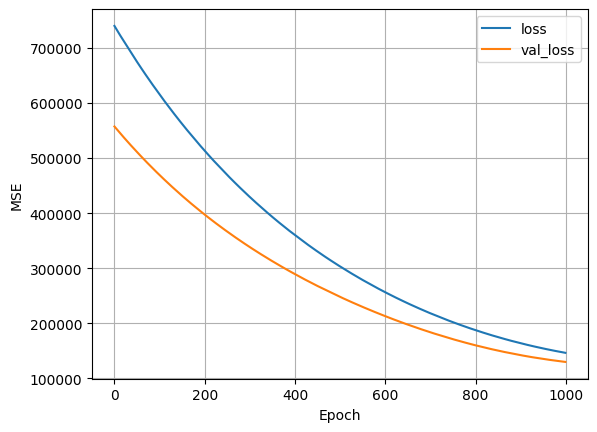

In [167]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


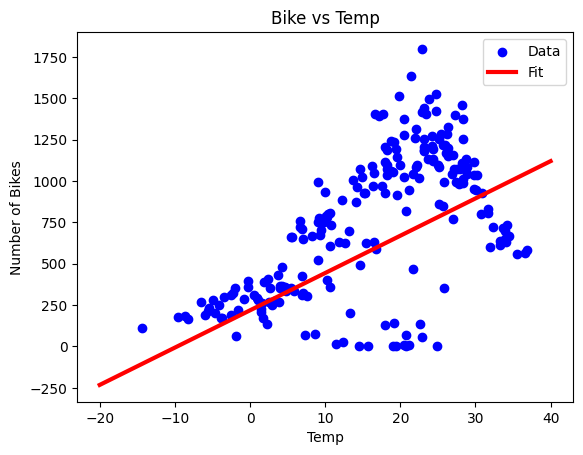

In [168]:
plt.scatter(x_train_temp, y_train_temp, color="blue", label="Data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), color="red", label="Fit", linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.show()

In [177]:
complex_nn = tf.keras.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(units=32, activation="relu"),
  tf.keras.layers.Dense(units=32, activation="relu"),
  tf.keras.layers.Dense(units=1, activation="relu")
])

complex_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss=tf.keras.losses.MeanSquaredError())

In [178]:
history = complex_nn.fit(
    x_train_temp.reshape(-1), y_train_temp,
    epochs=100,
    verbose=0,
   validation_data =(x_valid_temp, y_valid_temp))

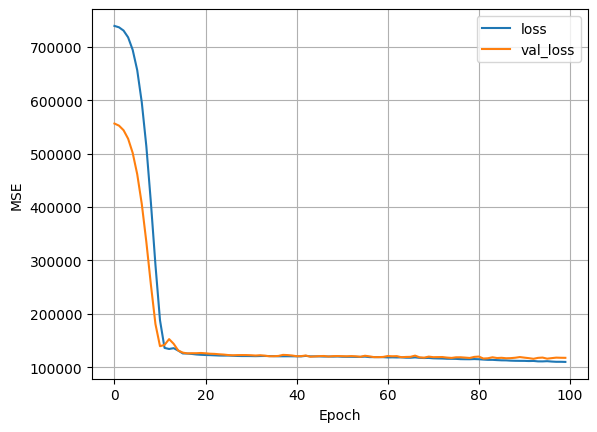

In [171]:
plot_loss(history)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


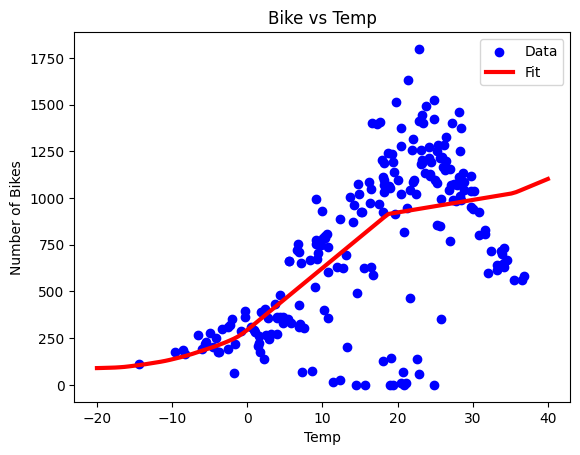

In [179]:
plt.scatter(x_train_temp, y_train_temp, color="blue", label="Data")
x = tf.linspace(-20, 40, 100)
plt.plot(x, complex_nn.predict(np.array(x).reshape(-1,1)), color="red", label="Fit", linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.show()

In [182]:
y_pre = complex_nn.predict(x_test_temp)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [183]:
np.mean((y_test_temp - y_pre) ** 2)

np.float64(121099.94884429306)

<ipython-input-190-55e8b9d28a71>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


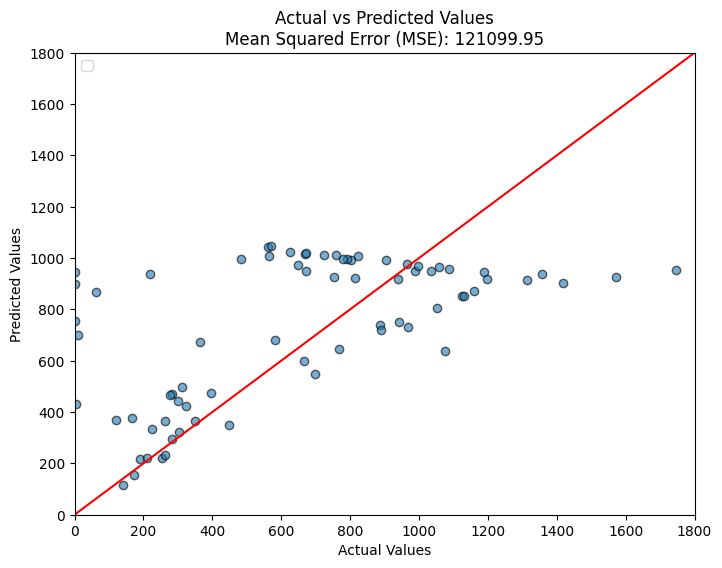

In [190]:
y_pred = y_pre
y_test = y_test_temp
mse = np.mean((y_test - y_pred) ** 2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted Values\nMean Squared Error (MSE): {mse:.2f}")
lims=[0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ =plt.plot(lims, lims, c="red")